In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn



from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier


In [143]:
# %pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv("DS_assignment1_xy.csv")

In [139]:
df1=pd.read_csv("DS_assignment1_xy.csv")

In [3]:
df.head(4)

,user_pseudo_id_,event_date_,game_number_count,days_from_first_open_max,user_skill_level_max,opp_skill_level_max,defend_ball_final_x_list,defend_ball_final_y_list,kicked_ball_final_x_list,kicked_ball_final_y_list,...,score_diff_proxy_mean,score_diff_proxy_max,score_diff_proxy_min,new_user_max,user_defend_save_ratio,user_kicked_goal_ratio,striker_draw_speed,striker_delta_x,striker_delta_y,next_day_label
0,0158f3555bfcf3307211dd08d74f8b35,2023-03-12,2,0,1.0,0.0,"[-1.6299999952316284, -1.3600000143051147, -3....","[1.7799999713897705, 2.109999895095825, 0.7599...","[-0.014005690813064575, -0.7603639364242554, -...","[1.3801789283752441, 1.7499996423721313, 1.214...",...,1.5,2,1,1,0.444444,0.888889,"[0.6612469004304308, 1.6197877615823635, 1.109...",[ 0.09732214 -0.03972352 -0.00649565 -0.025000...,[0.2480996 0.37378591 0.25374141 0.22772846 0...,0
1,391c54db54efadd7bbd61a75f6708639,2023-03-10,7,0,1.0,0.0,"[-2.700000047683716, 2.9200000762939453, 2.829...","[2.299999952316284, 1.5, 0.8500000238418579, 0...","[0.19276803731918335, 4.187291145324707, -0.57...","[1.3431631326675415, 0.11999999731779099, 0.11...",...,-1.0,0,-2,1,0.071429,0.535714,"[0.35824144896820354, 0.4072439837793489, 0.31...",[-0.02638888 0.22108769 -0.03686279 -0.154119...,[ 0.17498395 -0.08728341 0.16386123 0.207540...,0
2,46a9c73035829ec4e3769768dd7ee7ce,2023-03-10,6,0,2.0,0.0,"[-0.699999988079071, 2.7200000286102295, 2.819...","[0.8500000238418579, 0.8999999761581421, 0.319...","[2.2478864192962646, 2.7093796730041504, -1.94...","[0.11999999731779099, 0.11999999731779099, 0.1...",...,0.5,2,-2,1,0.333333,0.655172,"[0.7842936264160223, 0.5439909737291185, 0.964...",[ 0.22660387 0.22154033 -0.1380372 0.3125 ...,[0.12679428 0.15282944 0.20020626 0.18818802 0...,1
3,5db7e8154780d06b22b822f0027c6982,2023-03-04,1,0,1.0,0.0,"[-2.3478143215179443, -1.4504988193511963, -0....","[1.591681718826294, 1.6978604793548584, 0.1164...","[3.2453954219818115, -1.6123021841049194, 2.11...","[0.11999999731779099, 1.537162184715271, 1.531...",...,-2.0,-2,-2,1,0.000000,0.750000,"[0.6880020298657056, 0.4803395115500617, 0.465...",[ 0.22914177 -0.20694444 0.2820549 -0.04077423],[0.02288699 0.30708608 0.29567717 0.24580124],0


In [5]:
l=list(df.columns)

In [6]:
print(l)

['user_pseudo_id_', 'event_date_', 'game_number_count', 'days_from_first_open_max', 'user_skill_level_max', 'opp_skill_level_max', 'defend_ball_final_x_list', 'defend_ball_final_y_list', 'kicked_ball_final_x_list', 'kicked_ball_final_y_list', 'kicked_speed_list', 'opp_kicked_ball_final_x_list', 'opp_kicked_ball_final_y_list', 'opp_kicked_angle_list', 'opp_kicked_speed_list', 'opp_kicked_status_list', 'striker_draw_angle_corrected_list', 'striker_draw_length_corrected_list', 'striker_draw_time_taken_corrected_list', 'opp_score_mean', 'opp_score_max', 'opp_score_min', 'user_score_mean', 'user_score_max', 'user_score_min', 'user_won_mean', 'user_won_max', 'user_won_min', 'power_mean', 'ball_accuracy_mean', 'goalkeeping_mean', 'accuracy_mean', 'ball_curve_mean', 'ball_id_mean', 'defend_status_mr_Goal_mean', 'defend_status_mr_Goal_max', 'defend_status_mr_Goal_min', 'defend_status_mr_Saved_mean', 'defend_status_mr_Saved_max', 'defend_status_mr_Saved_min', 'defend_status_mr_Missed_mean', 'def

In [7]:
df.describe()

,game_number_count,days_from_first_open_max,user_skill_level_max,opp_skill_level_max,opp_score_mean,opp_score_max,opp_score_min,user_score_mean,user_score_max,user_score_min,...,opp_score_proxy_mean,opp_score_proxy_max,opp_score_proxy_min,score_diff_proxy_mean,score_diff_proxy_max,score_diff_proxy_min,new_user_max,user_defend_save_ratio,user_kicked_goal_ratio,next_day_label
count,117997.000000,117997.0,117997.000000,117997.0,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,...,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.0,117997.000000,117997.000000,117997.000000
mean,6.358238,0.0,2.221480,0.0,2.772637,4.090723,1.653279,2.513647,3.908616,1.314432,...,2.830922,4.279244,1.611677,-0.306035,0.928558,-1.527683,1.0,0.288664,0.525613,0.213319
std,6.952192,0.0,1.621352,0.0,1.304237,2.120337,1.460698,1.159736,2.140988,1.273173,...,1.107968,1.980080,1.366727,0.965041,1.445074,1.253041,0.0,0.205698,0.168960,0.409653
min,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-8.000000,-8.000000,-10.000000,1.0,0.000000,0.000000,0.000000
25%,2.000000,0.0,1.000000,0.0,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,...,2.000000,3.000000,0.000000,-1.000000,0.000000,-2.000000,1.0,0.125000,0.437500,0.000000
50%,4.000000,0.0,1.000000,0.0,3.000000,4.000000,2.000000,2.600000,4.000000,1.000000,...,2.900000,4.000000,1.000000,-0.250000,1.000000,-2.000000,1.0,0.266667,0.529412,0.000000
75%,8.000000,0.0,3.000000,0.0,3.615385,5.000000,3.000000,3.000000,5.000000,2.000000,...,3.500000,5.000000,3.000000,0.333333,2.000000,-1.000000,1.0,0.433333,0.623188,0.000000
max,153.000000,0.0,14.000000,0.0,16.000000,20.000000,16.000000,15.000000,20.000000,15.000000,...,24.000000,36.000000,16.000000,6.000000,18.000000,6.000000,1.0,1.000000,1.000000,1.000000


## Missing value analysis

In [8]:
df.isnull().sum()

user_pseudo_id_             0
event_date_                 0
game_number_count           0
days_from_first_open_max    0
user_skill_level_max        0
                           ..
user_kicked_goal_ratio      0
striker_draw_speed          0
striker_delta_x             0
striker_delta_y             0
next_day_label              0
Length: 143, dtype: int64

In [10]:
df.event_date_.value_counts()

2023-03-04    9856
2023-03-11    9761
2023-03-12    9637
2023-03-03    9319
2023-03-02    9273
2023-03-05    8751
2023-03-10    8701
2023-03-09    8184
2023-03-08    7862
2023-03-13    7641
2023-03-14    7152
2023-03-07    6792
2023-03-06    6579
2023-03-01    5726
2023-03-15    2662
2023-02-28     101
Name: event_date_, dtype: int64

## dropping irrelevant columns

In [11]:
df.days_from_first_open_max.value_counts()

0    117997
Name: days_from_first_open_max, dtype: int64

In [12]:
df.days_from_first_open_max.value_counts()

0.0    117997
Name: opp_skill_level_max, dtype: int64

In [13]:
df.drop(columns=["days_from_first_open_max","opp_skill_level_max"],inplace=True)

In [14]:
df.describe()

,game_number_count,user_skill_level_max,opp_score_mean,opp_score_max,opp_score_min,user_score_mean,user_score_max,user_score_min,user_won_mean,user_won_max,...,opp_score_proxy_mean,opp_score_proxy_max,opp_score_proxy_min,score_diff_proxy_mean,score_diff_proxy_max,score_diff_proxy_min,new_user_max,user_defend_save_ratio,user_kicked_goal_ratio,next_day_label
count,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,...,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.0,117997.000000,117997.000000,117997.000000
mean,6.358238,2.221480,2.772637,4.090723,1.653279,2.513647,3.908616,1.314432,0.403675,0.701603,...,2.830922,4.279244,1.611677,-0.306035,0.928558,-1.527683,1.0,0.288664,0.525613,0.213319
std,6.952192,1.621352,1.304237,2.120337,1.460698,1.159736,2.140988,1.273173,0.339722,0.457557,...,1.107968,1.980080,1.366727,0.965041,1.445074,1.253041,0.0,0.205698,0.168960,0.409653
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-8.000000,-8.000000,-10.000000,1.0,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,0.000000,-1.000000,0.000000,-2.000000,1.0,0.125000,0.437500,0.000000
50%,4.000000,1.000000,3.000000,4.000000,2.000000,2.600000,4.000000,1.000000,0.400000,1.000000,...,2.900000,4.000000,1.000000,-0.250000,1.000000,-2.000000,1.0,0.266667,0.529412,0.000000
75%,8.000000,3.000000,3.615385,5.000000,3.000000,3.000000,5.000000,2.000000,0.666667,1.000000,...,3.500000,5.000000,3.000000,0.333333,2.000000,-1.000000,1.0,0.433333,0.623188,0.000000
max,153.000000,14.000000,16.000000,20.000000,16.000000,15.000000,20.000000,15.000000,1.000000,1.000000,...,24.000000,36.000000,16.000000,6.000000,18.000000,6.000000,1.0,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117997 entries, 0 to 117996
Columns: 141 entries, user_pseudo_id_ to next_day_label
dtypes: float64(54), int64(69), object(18)
memory usage: 126.9+ MB


In [19]:
for i in df.columns:
    if df[i].dtype=="object":
        print(i)

user_pseudo_id_
event_date_
defend_ball_final_x_list
defend_ball_final_y_list
kicked_ball_final_x_list
kicked_ball_final_y_list
kicked_speed_list
opp_kicked_ball_final_x_list
opp_kicked_ball_final_y_list
opp_kicked_angle_list
opp_kicked_speed_list
opp_kicked_status_list
striker_draw_angle_corrected_list
striker_draw_length_corrected_list
striker_draw_time_taken_corrected_list
striker_draw_speed
striker_delta_x
striker_delta_y


In [20]:
df["kicked_speed_list"].value_counts()

[20.0, 20.0, 20.0, 20.0]                                                                                                                                                                                                                                                                                                                                        459
[20.0]                                                                                                                                                                                                                                                                                                                                                          456
[20.0, 20.0]                                                                                                                                                                                                                                                                                    

## Imbalance data

In [21]:
df["next_day_label"].value_counts()

0    92826
1    25171
Name: next_day_label, dtype: int64

In [22]:
92826/(92826+25171)

0.7866810173139995

In [23]:
df.opp_kicked_status_list.value_counts()

['Goal', 'Goal', 'Goal', 'Goal']                                                                                                                                                                                                                                                                                                                                                                                                                                                                  1502
['Goal', 'Goal', 'Goal']                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1177
['Goal', 'Goal']          

In [24]:
print(df.opp_kicked_status_list.dtype)

object


In [30]:
import ast
l=ast.literal_eval(l[0])

In [31]:
print(type(l))

<class 'list'>


In [25]:
l=df.opp_kicked_status_list

In [33]:
print(set(l))

{'Saved', 'Goal'}


In [28]:
l[0]

"['Goal', 'Goal', 'Saved', 'Saved', 'Goal', 'Goal', 'Saved', 'Goal', 'Saved']"

## Feature Engineering

In [34]:
df["event_date_"]=pd.to_datetime(df["event_date_"])

In [35]:
df["event_date_"].max()

Timestamp('2023-03-15 00:00:00')

In [36]:
df["event_date_"].min()

Timestamp('2023-02-28 00:00:00')

In [39]:
df['Weekday'] = df['DateTime'].dt.dayofyear'].dt.weekday

In [41]:
df['DayOfYear'] = df['event_date_'].dt.dayofyear

In [42]:
df['month'] = df['event_date_'].dt.month

In [43]:
import ast

In [77]:
import statistics
def getmedian(x):
    x=ast.literal_eval(x)
    if len(x)==0:
        return 0
    return statistics.median(x)

In [78]:
import statistics
def getmean(x):
    x=ast.literal_eval(x)
    if len(x)==0:
        return 0
    return statistics.mean(x)

In [45]:
for i in df.columns:
    if df[i].dtype=="object":
        print(i)

user_pseudo_id_
defend_ball_final_x_list
defend_ball_final_y_list
kicked_ball_final_x_list
kicked_ball_final_y_list
kicked_speed_list
opp_kicked_ball_final_x_list
opp_kicked_ball_final_y_list
opp_kicked_angle_list
opp_kicked_speed_list
opp_kicked_status_list
striker_draw_angle_corrected_list
striker_draw_length_corrected_list
striker_draw_time_taken_corrected_list
striker_draw_speed
striker_delta_x
striker_delta_y


In [50]:
df["defend_ball_final_x_list_median"]=df["defend_ball_final_x_list"].apply(lambda x : getmedian(x))

In [56]:
df["defend_ball_final_x_list_mean"]=df["defend_ball_final_x_list"].apply(lambda x : getmean(x))

In [60]:
df["defend_ball_final_y_list_median"]=df["defend_ball_final_y_list"].apply(lambda x : getmedian(x))

In [61]:
df["defend_ball_final_y_list_mean"]=df["defend_ball_final_y_list"].apply(lambda x : getmean(x))

In [62]:
df["kicked_ball_final_x_list_median"]=df["kicked_ball_final_x_list"].apply(lambda x : getmedian(x))
df["kicked_ball_final_x_list_mean"]=df["kicked_ball_final_x_list"].apply(lambda x : getmean(x))

In [63]:
df["kicked_ball_final_y_list_median"]=df["kicked_ball_final_y_list"].apply(lambda x : getmedian(x))
df["kicked_ball_final_y_list_mean"]=df["kicked_ball_final_y_list"].apply(lambda x : getmean(x))

In [64]:
df["kicked_speed_list_median"]=df["kicked_speed_list"].apply(lambda x : getmedian(x))
df["kicked_speed_list_mean"]=df["kicked_speed_list"].apply(lambda x : getmean(x))

In [65]:
df["opp_kicked_ball_final_x_list_median"]=df["opp_kicked_ball_final_x_list"].apply(lambda x : getmedian(x))
df["opp_kicked_ball_final_x_list_mean"]=df["opp_kicked_ball_final_x_list"].apply(lambda x : getmean(x))

In [66]:
df["opp_kicked_ball_final_y_list_median"]=df["opp_kicked_ball_final_y_list"].apply(lambda x : getmedian(x))
df["opp_kicked_ball_final_y_list_mean"]=df["opp_kicked_ball_final_y_list"].apply(lambda x : getmean(x))

In [67]:
df["opp_kicked_angle_list_median"]=df["opp_kicked_angle_list"].apply(lambda x : getmedian(x))
df["opp_kicked_angle_list_mean"]=df["opp_kicked_angle_list"].apply(lambda x : getmean(x))

In [68]:
df["opp_kicked_speed_list_median"]=df["opp_kicked_speed_list"].apply(lambda x : getmedian(x))
df["opp_kicked_speed_list_mean"]=df["opp_kicked_speed_list"].apply(lambda x : getmean(x))

In [ ]:
# '''user_skill_level_max', 'opp_kicked_status_list_Goal',
#        'is_opponent_bot_mean', 'user_won_mean', 'opp_kicked_status_list_Saved',
#        'DayOfYear', 'score_diff_proxy_max', 'defend_status_ct_Saved_max',
#        'score_diff_mean', 'next_day_label', 'game_number_count',
#        'kicked_status_mr_Saved_max', 'kicked_status_mr_TimeOut_min'''

In [69]:
for i in df.columns:
    if df[i].dtype=="object":
        print(i)

user_pseudo_id_
defend_ball_final_x_list
defend_ball_final_y_list
kicked_ball_final_x_list
kicked_ball_final_y_list
kicked_speed_list
opp_kicked_ball_final_x_list
opp_kicked_ball_final_y_list
opp_kicked_angle_list
opp_kicked_speed_list
opp_kicked_status_list
striker_draw_angle_corrected_list
striker_draw_length_corrected_list
striker_draw_time_taken_corrected_list
striker_draw_speed
striker_delta_x
striker_delta_y


In [70]:
def status_list(x,strng):
    x=ast.literal_eval(x)
    return x.count(strng)

In [71]:
df["opp_kicked_status_list_Goal"]=df["opp_kicked_status_list"].apply(lambda x : status_list(x,"Goal"))

In [72]:
df["opp_kicked_status_list_Saved"]=df["opp_kicked_status_list"].apply(lambda x : status_list(x,"Saved"))

In [73]:
df["opp_kicked_status_list_TimeOut"]=df["opp_kicked_status_list"].apply(lambda x : status_list(x,"TimeOut"))

In [74]:
df["opp_kicked_status_list_Missed"]=df["opp_kicked_status_list"].apply(lambda x : status_list(x,"Missed"))

In [79]:
df["striker_draw_angle_corrected_list_median"]=df["striker_draw_angle_corrected_list"].apply(lambda x : getmedian(x))
df["striker_draw_angle_corrected_list_mean"]=df["striker_draw_angle_corrected_list"].apply(lambda x : getmean(x))

In [80]:
df["striker_draw_length_corrected_list_median"]=df["striker_draw_length_corrected_list"].apply(lambda x : getmedian(x))
df["striker_draw_length_corrected_list_mean"]=df["striker_draw_length_corrected_list"].apply(lambda x : getmean(x))

In [81]:
df["striker_draw_time_taken_corrected_list_median"]=df["striker_draw_time_taken_corrected_list"].apply(lambda x : getmedian(x))
df["striker_draw_time_taken_corrected_list_mean"]=df["striker_draw_time_taken_corrected_list"].apply(lambda x : getmean(x))

In [82]:
df["striker_draw_speed_median"]=df["striker_draw_speed"].apply(lambda x : getmedian(x))
df["striker_draw_speed_mean"]=df["striker_draw_speed"].apply(lambda x : getmean(x))

In [86]:
df.drop(columns=["striker_delta_x","striker_delta_y"],inplace=True)

In [87]:
df.drop(columns=["user_pseudo_id_",
"defend_ball_final_x_list",
"defend_ball_final_y_list",
"kicked_ball_final_x_list",
"kicked_ball_final_y_list",
"kicked_speed_list",
"opp_kicked_ball_final_x_list",
"opp_kicked_ball_final_y_list",
"opp_kicked_angle_list",
"opp_kicked_speed_list",
"opp_kicked_status_list",
"striker_draw_angle_corrected_list",
"striker_draw_length_corrected_list",
"striker_draw_time_taken_corrected_list",
"striker_draw_speed" ],inplace=True)

In [88]:
df.head(4)

,event_date_,game_number_count,user_skill_level_max,opp_score_mean,opp_score_max,opp_score_min,user_score_mean,user_score_max,user_score_min,user_won_mean,...,opp_kicked_status_list_TimeOut,opp_kicked_status_list_Missed,striker_draw_angle_corrected_list_median,striker_draw_angle_corrected_list_mean,striker_draw_length_corrected_list_median,striker_draw_length_corrected_list_mean,striker_draw_time_taken_corrected_list_median,striker_draw_time_taken_corrected_list_mean,striker_draw_speed_median,striker_draw_speed_mean
0,2023-03-12,2,1.0,2.50,3.0,2.0,4.0,4.0,4.0,1.0,...,0,0,102.814705,97.944024,0.419207,0.524483,0.498795,0.530256,0.869335,0.994597
1,2023-03-10,7,1.0,4.25,5.0,3.0,2.5,4.0,1.0,0.0,...,0,4,82.577457,85.285214,0.419342,0.471792,1.015686,0.829526,0.448052,0.796028
2,2023-03-10,6,2.0,3.00,5.0,2.0,3.4,6.0,0.0,0.6,...,0,2,115.301529,89.374845,0.406255,0.416400,0.250130,0.342987,1.371202,1.732349
3,2023-03-04,1,1.0,5.00,5.0,5.0,3.0,3.0,3.0,0.0,...,0,0,55.926695,59.739163,0.489365,0.505224,1.018383,0.868121,0.584171,0.599195


In [89]:
df.drop(columns=["event_date_"],inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117997 entries, 0 to 117996
Columns: 156 entries, game_number_count to striker_draw_speed_mean
dtypes: float64(80), int64(76)
memory usage: 140.4 MB


## Picking the important features
---As the number of feature variable is large

In [93]:
X = df.drop('next_day_label', axis=1) 
y = df['next_day_label']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model on the original dataset
model = RandomForestClassifier()  
model.fit(X_train, y_train)

# Calculate the baseline metric
baseline_metric = model.score(X_val, y_val)

# Perform permutation importance
result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Sort the feature importance scores
sorted_indices = importance_scores.argsort()[::-1]

# Select the top features
top_features = X.columns[sorted_indices][:20]  



Feature: game_number_count, Importance Score: 0.0022
Feature: user_skill_level_max, Importance Score: 0.0021
Feature: opp_kicked_status_list_Goal, Importance Score: 0.0018
Feature: is_opponent_bot_mean, Importance Score: 0.0018
Feature: user_won_mean, Importance Score: 0.0017
Feature: opp_kicked_status_list_Saved, Importance Score: 0.0016
Feature: DayOfYear, Importance Score: 0.0015
Feature: score_diff_proxy_max, Importance Score: 0.0013
Feature: defend_status_ct_Saved_max, Importance Score: 0.0012
Feature: score_diff_mean, Importance Score: 0.0011


In [94]:
# Print the top features and their importance scores
for feature, score in zip(top_features, importance_scores[sorted_indices][:20]):
    print(f"Feature: {feature}, Importance Score: {score:.4f}")

Feature: game_number_count, Importance Score: 0.0022
Feature: user_skill_level_max, Importance Score: 0.0021
Feature: opp_kicked_status_list_Goal, Importance Score: 0.0018
Feature: is_opponent_bot_mean, Importance Score: 0.0018
Feature: user_won_mean, Importance Score: 0.0017
Feature: opp_kicked_status_list_Saved, Importance Score: 0.0016
Feature: DayOfYear, Importance Score: 0.0015
Feature: score_diff_proxy_max, Importance Score: 0.0013
Feature: defend_status_ct_Saved_max, Importance Score: 0.0012
Feature: score_diff_mean, Importance Score: 0.0011
Feature: defend_ball_final_x_list_median, Importance Score: 0.0010
Feature: opp_kicked_status_list_Missed, Importance Score: 0.0010
Feature: defend_status_mr_TimeOut_mean, Importance Score: 0.0009
Feature: opp_kicked_ball_final_x_list_median, Importance Score: 0.0009
Feature: user_score_mean, Importance Score: 0.0009
Feature: defend_response_status_mr_OnTime_mean, Importance Score: 0.0009
Feature: defend_response_status_mr_TooEarly_mean, Imp

In [98]:
# Separate the features from the target variable
X = df.drop('next_day_label', axis=1)  # Replace 'target_variable' with the name of your target column
y = df['next_day_label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward selection
included_features = []
best_accuracy = 0.0

while True:
    # Initialize variables
    feature_candidates = list(set(X.columns) - set(included_features))
    best_feature = None
    temp_accuracy = 0.0
    
    for feature in feature_candidates:
        # Create a new feature set
        new_features = included_features + [feature]
        X_train_new = X_train[new_features]
        X_test_new = X_test[new_features]
        
        # Train a model
        model = RandomForestClassifier() 
        model.fit(X_train_new, y_train)
        
        # Evaluate the model
        y_pred = model.predict(X_test_new)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Check if the accuracy improved
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature = feature
    
    # Check if adding a feature improved the accuracy
    if best_feature is not None:
        included_features.append(best_feature)
    else:
        break

# Backward elimination
while True:
    # Initialize variables
    temp_accuracy = best_accuracy
    excluded_feature = None
    
    for feature in included_features:
        # Create a new feature set
        new_features = list(set(included_features) - set([feature]))
        X_train_new = X_train[new_features]
        X_test_new = X_test[new_features]
        
        # Train a model
        model = RandomForestClassifier() 
        model.fit(X_train_new, y_train)
        
        # Evaluate the model
        y_pred = model.predict(X_test_new)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Check if the accuracy improved
        if accuracy > temp_accuracy:
            temp_accuracy = accuracy
            excluded_feature = feature
    
    # Check if removing a feature improved the accuracy
    if excluded_feature is not None:
        included_features.remove(excluded_feature)
        best_accuracy = temp_accuracy
    else:
        break

# Print the selected features
print("Selected Features:")
for feature in included_features:
    print(feature)

Selected Features:
game_number_count
kicked_status_mr_Saved_max
kicked_status_mr_TimeOut_min


In [99]:
df_new=df[["game_number_count",
"kicked_status_mr_Saved_max",
"kicked_status_mr_TimeOut_min","next_day_label"]]

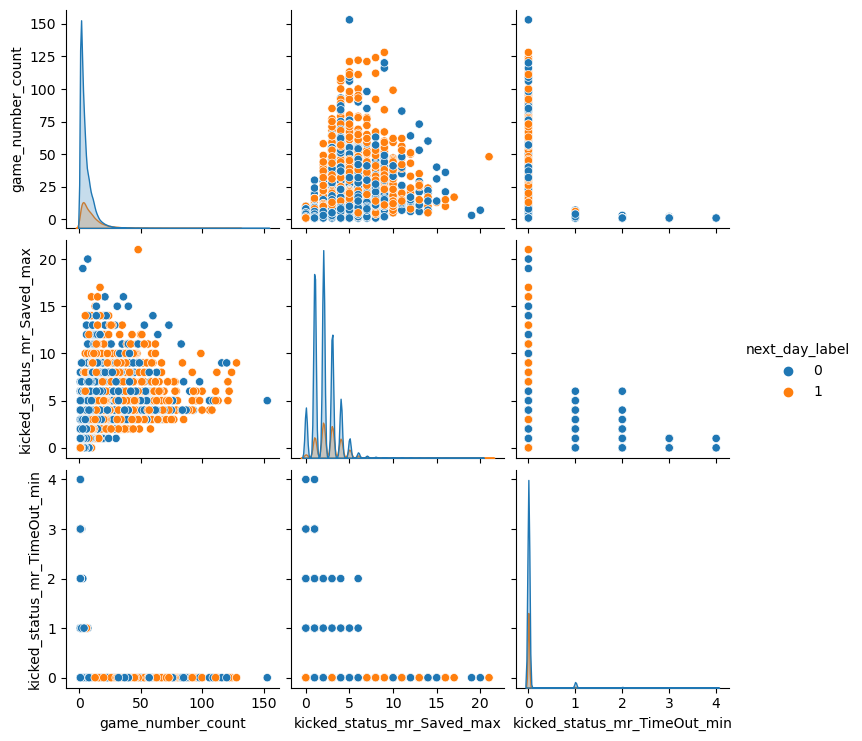

In [101]:

# pairplot with hue next_day_label
seaborn.pairplot(df_new, hue ='next_day_label')
# to show
plt.show()

In [106]:
df_new1=df[["game_number_count","user_skill_level_max","opp_kicked_status_list_Goal","is_opponent_bot_mean","user_won_mean","opp_kicked_status_list_Saved","DayOfYear","score_diff_proxy_max","defend_status_ct_Saved_max","score_diff_mean",'next_day_label']]

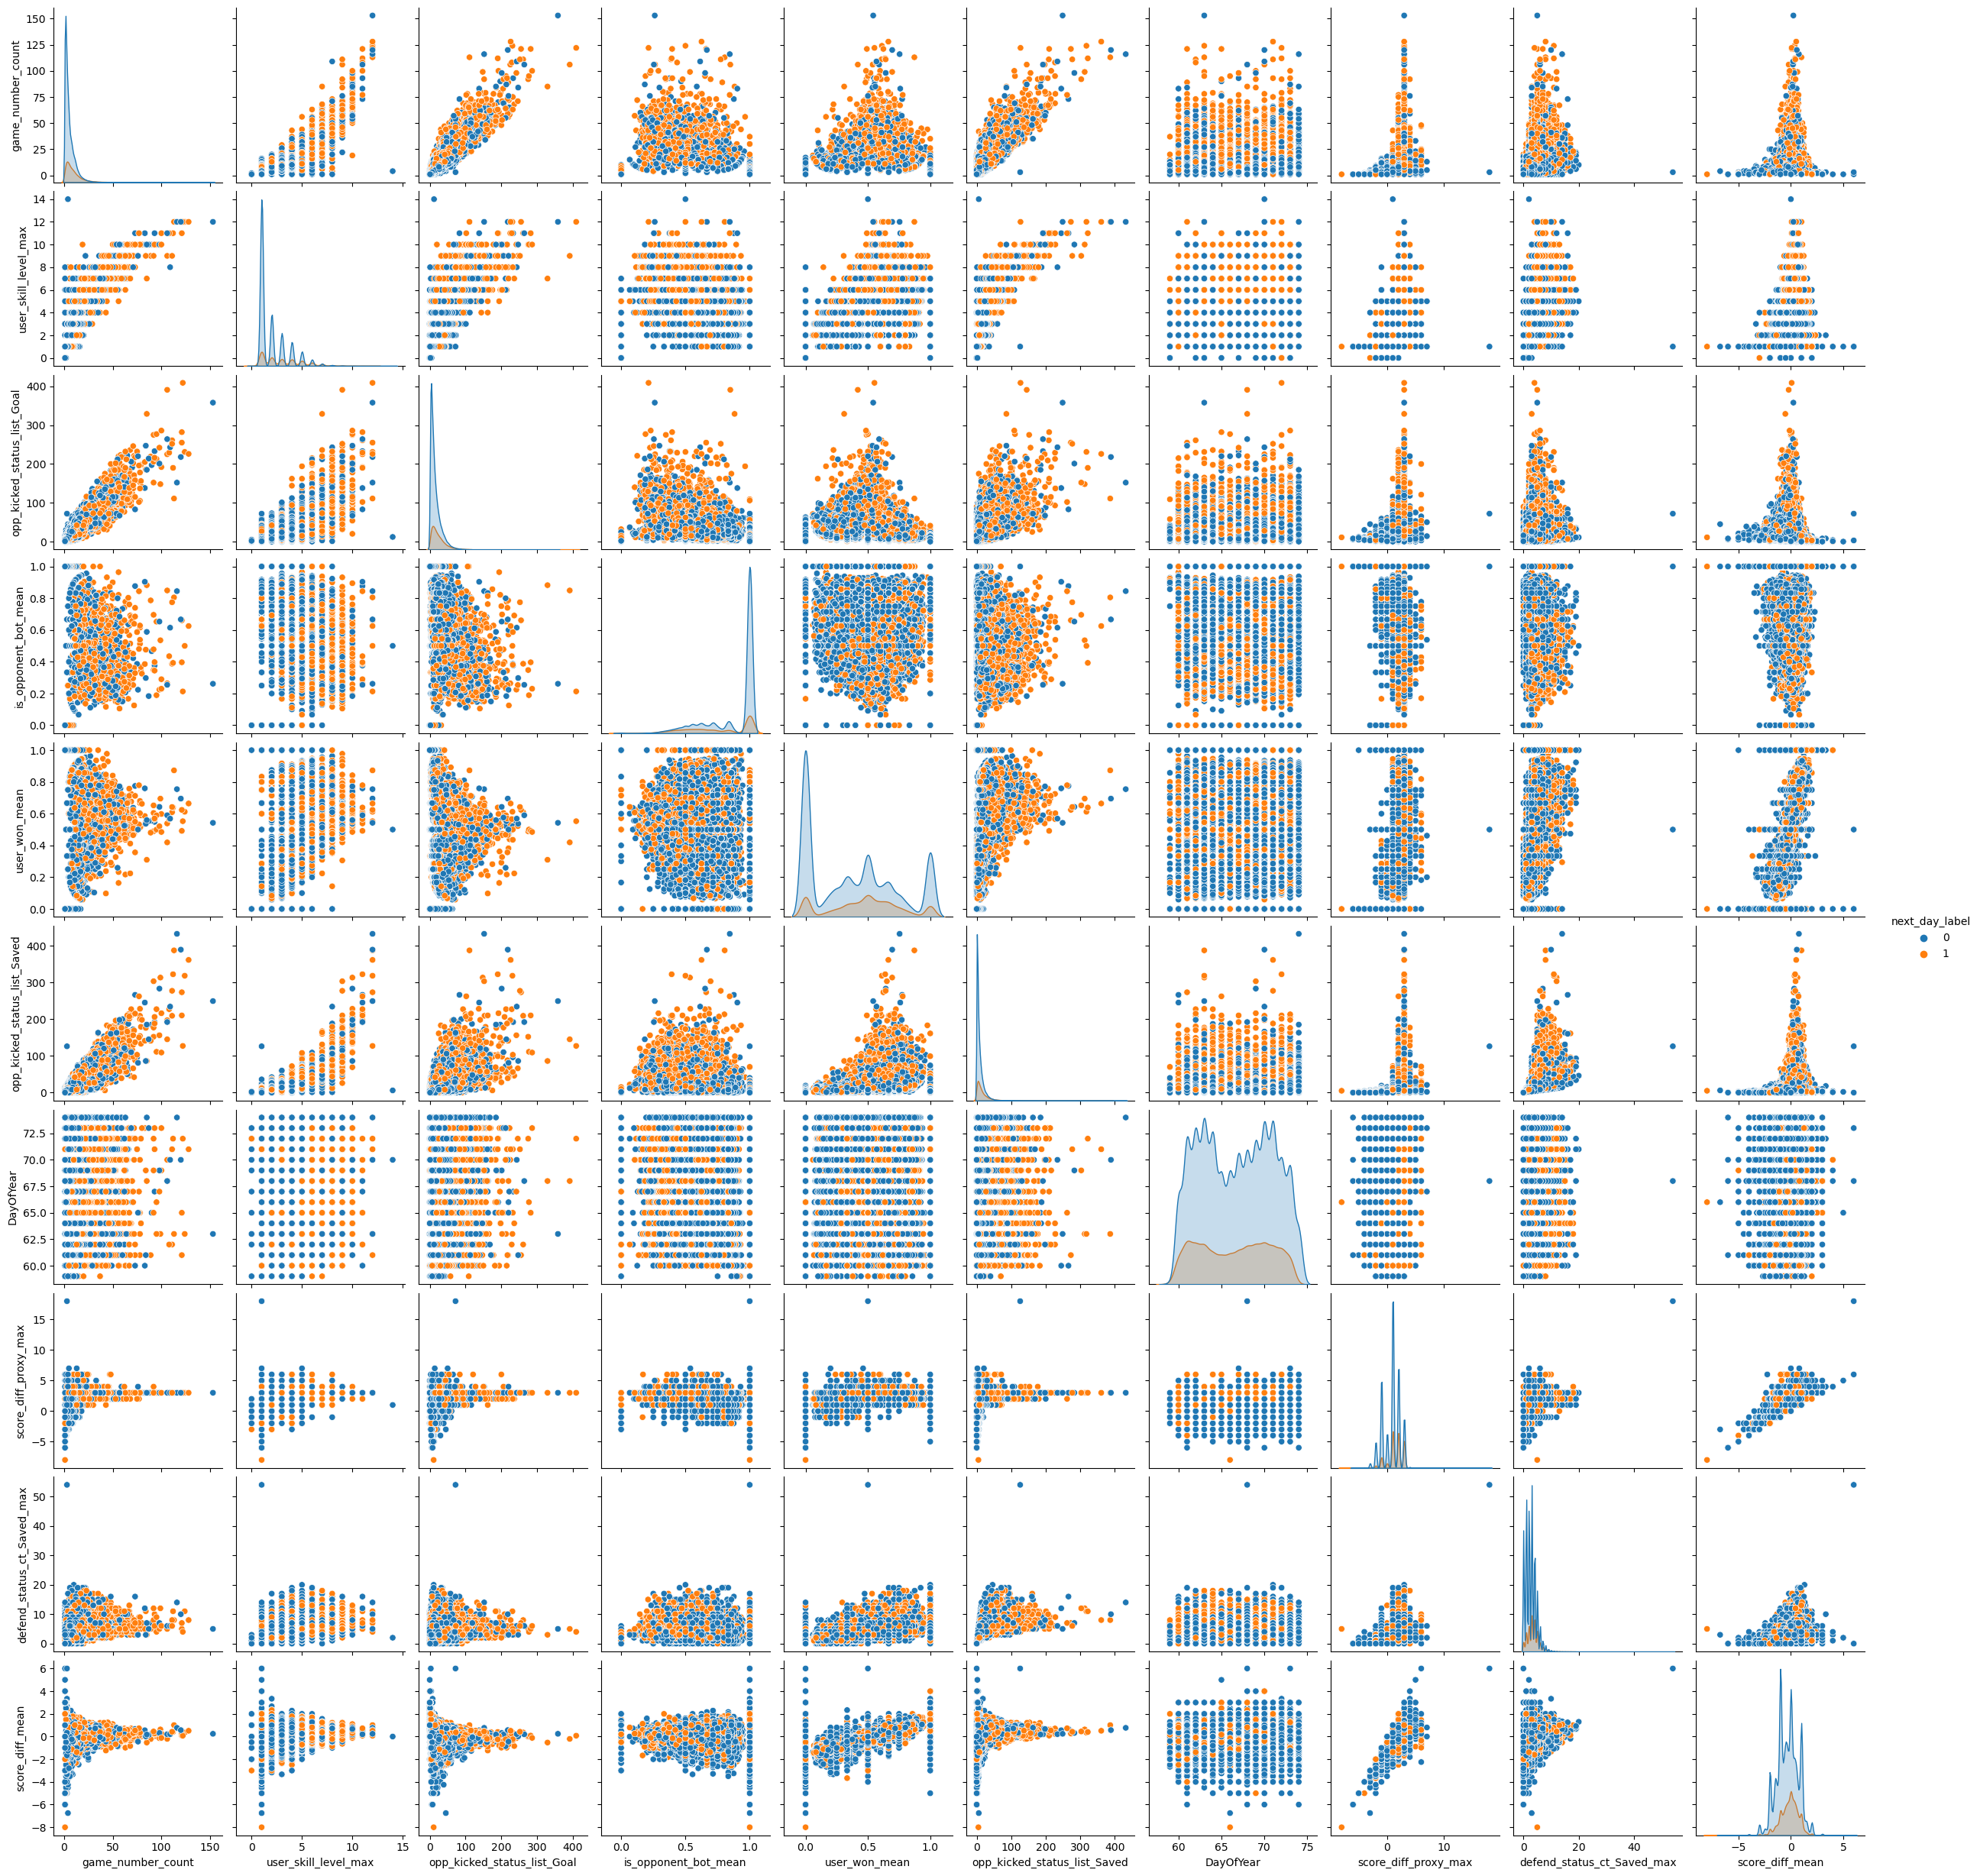

In [107]:

# pairplot with hue next_day_label
seaborn.pairplot(df_new1, hue ='next_day_label')
# to show
plt.show()

In [108]:
df_gamecount=df.loc[(df.game_number_count>0) & (df.next_day_label!=0)]

In [109]:
df_gamecount.shape

(25171, 156)

In [111]:
import seaborn as sns

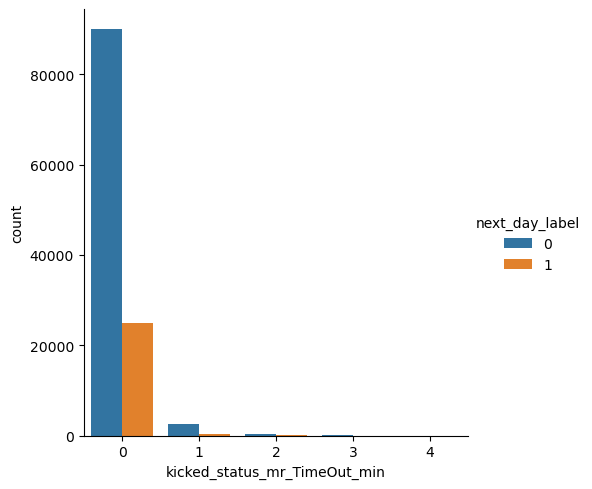

In [113]:
# Specify the variable to plot and the hue variable
x = 'kicked_status_mr_TimeOut_min'
hue = 'next_day_label'

# Create a bar plot with hue
sns.catplot(x=x, kind='count', hue=hue, data=df_new)
plt.show()

In [115]:
df_ksmtm=df.loc[df.kicked_status_mr_TimeOut_min >2]

In [117]:
df_ksmtm[["kicked_status_mr_TimeOut_min","next_day_label"]].shape

(52, 2)

In [122]:
from sklearn.decomposition import PCA



X = df.drop('next_day_label', axis=1)  

# Initialize PCA with all components
pca = PCA(n_components=X.shape[1])

# Fit PCA on the data
pca.fit(X)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components that explain at least 85% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print the number of components
print("Number of components explaining at least 95% variance:", n_components)

Number of components explaining at least 95% variance: 5


In [125]:
df.head(4)

,game_number_count,user_skill_level_max,opp_score_mean,opp_score_max,opp_score_min,user_score_mean,user_score_max,user_score_min,user_won_mean,user_won_max,...,opp_kicked_status_list_TimeOut,opp_kicked_status_list_Missed,striker_draw_angle_corrected_list_median,striker_draw_angle_corrected_list_mean,striker_draw_length_corrected_list_median,striker_draw_length_corrected_list_mean,striker_draw_time_taken_corrected_list_median,striker_draw_time_taken_corrected_list_mean,striker_draw_speed_median,striker_draw_speed_mean
0,2,1.0,2.50,3.0,2.0,4.0,4.0,4.0,1.0,1.0,...,0,0,102.814705,97.944024,0.419207,0.524483,0.498795,0.530256,0.869335,0.994597
1,7,1.0,4.25,5.0,3.0,2.5,4.0,1.0,0.0,0.0,...,0,4,82.577457,85.285214,0.419342,0.471792,1.015686,0.829526,0.448052,0.796028
2,6,2.0,3.00,5.0,2.0,3.4,6.0,0.0,0.6,1.0,...,0,2,115.301529,89.374845,0.406255,0.416400,0.250130,0.342987,1.371202,1.732349
3,1,1.0,5.00,5.0,5.0,3.0,3.0,3.0,0.0,0.0,...,0,0,55.926695,59.739163,0.489365,0.505224,1.018383,0.868121,0.584171,0.599195


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117997 entries, 0 to 117996
Columns: 156 entries, game_number_count to striker_draw_speed_mean
dtypes: float64(80), int64(76)
memory usage: 140.4 MB


In [131]:
df[["game_number_count","user_skill_level_max","opp_kicked_status_list_Goal","is_opponent_bot_mean","user_won_mean","opp_kicked_status_list_Saved","DayOfYear","score_diff_proxy_max","defend_status_ct_Saved_max","score_diff_mean","kicked_status_mr_Saved_max",
"kicked_status_mr_TimeOut_min"]].describe()

,game_number_count,user_skill_level_max,opp_kicked_status_list_Goal,is_opponent_bot_mean,user_won_mean,opp_kicked_status_list_Saved,DayOfYear,score_diff_proxy_max,defend_status_ct_Saved_max,score_diff_mean,kicked_status_mr_Saved_max,kicked_status_mr_TimeOut_min
count,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000,117997.000000
mean,6.358238,2.221480,17.379984,0.850662,0.403675,10.194708,66.698450,0.928558,2.705628,-0.306035,2.227463,0.030272
std,6.952192,1.621352,18.529392,0.214356,0.339722,15.157292,4.092889,1.445074,1.977333,0.965041,1.402041,0.193496
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,-8.000000,0.000000,-8.000000,0.000000,0.000000
25%,2.000000,1.000000,5.000000,0.700000,0.000000,2.000000,63.000000,0.000000,1.000000,-1.000000,1.000000,0.000000
50%,4.000000,1.000000,12.000000,1.000000,0.400000,5.000000,67.000000,1.000000,3.000000,-0.250000,2.000000,0.000000
75%,8.000000,3.000000,23.000000,1.000000,0.666667,13.000000,70.000000,2.000000,4.000000,0.333333,3.000000,0.000000
max,153.000000,14.000000,409.000000,1.000000,1.000000,432.000000,74.000000,18.000000,54.000000,6.000000,21.000000,4.000000


In [132]:
sns.boxplot(df=df[variables], ax=ax)

<Axes: title={'center': 'Boxplot of Variables'}>

In [140]:
df1["user_pseudo_id_"].value_counts()

0158f3555bfcf3307211dd08d74f8b35    1
1ed9c2d7263bfa1bf1003a7c63ad8c0b    1
423911bfcf43034cf5d574f8074638ad    1
0fc9438948a66a6d76d854f4a07ecf29    1
f6e37e33c665981e160f33f2f27337fc    1
                                   ..
0d88e67a94029cb0e0626b164e461d14    1
b1988bb552ef10b5eaeefcaf0519465b    1
1aba2fec8e4c09da35624e33d84d7457    1
ab3b3934fa840fd3b119e02c7617a306    1
4f3c273d0c349a5dd820c33e7927c914    1
Name: user_pseudo_id_, Length: 117997, dtype: int64

In [153]:
df_rf=df[["user_skill_level_max","opp_kicked_status_list_Goal","is_opponent_bot_mean","user_won_mean","opp_kicked_status_list_Saved","DayOfYear","score_diff_proxy_max","defend_status_ct_Saved_max","score_diff_mean",'next_day_label',"game_number_count",
"kicked_status_mr_Saved_max","kicked_status_mr_TimeOut_min"]]

## Model Building and Evaluation

In [170]:
# Separate the features and target variable
X = df_rf.drop('next_day_label', axis=1)
y = df_rf['next_day_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
dt_scores = cross_val_score(dt, X_train, y_train, cv=5)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions,average='weighted')
dt_recall = recall_score(y_test, dt_predictions,average='weighted')
dt_f1 = f1_score(y_test, dt_predictions,average='weighted')

print("Decision Tree:")
print("Cross-Validation Accuracy:", dt_scores.mean())
print("Test Accuracy:", dt_accuracy)
print("Test Precision:", dt_precision)
print("Test Recall:", dt_recall)
print("Test F1 Score:", dt_f1)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions,average='weighted')
rf_recall = recall_score(y_test, rf_predictions,average='weighted')
rf_f1 = f1_score(y_test, rf_predictions,average='weighted')

print("\nRandom Forest:")
print("Cross-Validation Accuracy:", rf_scores.mean())
print("Test Accuracy:", rf_accuracy)
print("Test Precision:", rf_precision)
print("Test Recall:", rf_recall)
print("Test F1 Score:", rf_f1)


# XGBoost
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

print("\nXGBoost:")
print("Cross-Validation Accuracy:", xgb_scores.mean())
print("Test Accuracy:", xgb_accuracy)
print("Test Precision:", xgb_precision)
print("Test Recall:", xgb_recall)
print("Test F1 Score:", xgb_f1)

Decision Tree:
Cross-Validation Accuracy: 0.7875673990066984
Test Accuracy: 0.7908898305084746
Test Precision: 0.7478048132797959
Test Recall: 0.7908898305084746
Test F1 Score: 0.7367935639735835

Random Forest:
Cross-Validation Accuracy: 0.7907242757399711
Test Accuracy: 0.7919491525423729
Test Precision: 0.7579470183129493
Test Recall: 0.7919491525423729
Test F1 Score: 0.7178210910607353

XGBoost:
Cross-Validation Accuracy: 0.790628936195809
Test Accuracy: 0.7934322033898306
Test Precision: 0.6032608695652174
Test Recall: 0.08832305550029838
Test F1 Score: 0.1540864133263925


In [152]:
df_rf.columns

Index(['game_number_count', 'user_skill_level_max',
       'opp_kicked_status_list_Goal', 'is_opponent_bot_mean', 'user_won_mean',
       'opp_kicked_status_list_Saved', 'DayOfYear', 'score_diff_proxy_max',
       'defend_status_ct_Saved_max', 'score_diff_mean', 'next_day_label',
       'game_number_count', 'kicked_status_mr_Saved_max',
       'kicked_status_mr_TimeOut_min'],
      dtype='object')

## Hyperparameter Tuning

In [157]:
# Random Forest
rf = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_
rf_predictions = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("\nRandom Forest:")
print("Best Parameters:", rf_grid.best_params_)
print("Test Accuracy:", rf_accuracy)
print("Test Precision:", rf_precision)
print("Test Recall:", rf_recall)
print("Test F1 Score:", rf_f1)


Random Forest:
Best Parameters: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.7929237288135593
Test Precision: 0.6038575667655787
Test Recall: 0.08096280087527352
Test F1 Score: 0.14278196807577617


In [161]:
# Assuming 'X' contains the feature variables and 'y' contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling using SMOTE
oversampler = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Define the RandomForestClassifier with class weights
class_weights = dict(zip([0, 1], [1.150, 1.887]))  # Adjust the weights as per your dataset imbalance
rf_classifier = RandomForestClassifier(class_weight=class_weights)

# Train the model with oversampled data
rf_classifier.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

Test Accuracy: 0.7161440677966102
Test Precision: 0.3103448275862069
Test Recall: 0.2721304953252437
Test F1 Score: 0.2899841017488077


In [160]:
rf

RandomForestClassifier()

In [173]:
import pickle

# Assuming you have a trained model named 'model'
model = rf

# Pickle the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [163]:
df_rf.columns

Index(['user_skill_level_max', 'opp_kicked_status_list_Goal',
       'is_opponent_bot_mean', 'user_won_mean', 'opp_kicked_status_list_Saved',
       'DayOfYear', 'score_diff_proxy_max', 'defend_status_ct_Saved_max',
       'score_diff_mean', 'next_day_label', 'game_number_count',
       'kicked_status_mr_Saved_max', 'kicked_status_mr_TimeOut_min'],
      dtype='object')

In [166]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [164]:
import pickle

# Load the pickled model
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [165]:
model

RandomForestClassifier()

In [167]:
# function to check prediction
def getPredictions(df):
    df["opp_kicked_status_list_Goal"]=df["opp_kicked_status_list"].apply(lambda x : status_list(x,"Goal"))
    df["opp_kicked_status_list_Saved"]=df["opp_kicked_status_list"].apply(lambda x : status_list(x,"Saved"))
    df["event_date_"]=pd.to_datetime(df["event_date_"])
    df['DayOfYear'] = df['event_date_'].dt.dayofyear
    df_for_prediction=df[['user_skill_level_max', 'opp_kicked_status_list_Goal',
       'is_opponent_bot_mean', 'user_won_mean', 'opp_kicked_status_list_Saved',
       'DayOfYear', 'score_diff_proxy_max', 'defend_status_ct_Saved_max',
       'score_diff_mean', 'next_day_label', 'game_number_count',
       'kicked_status_mr_Saved_max', 'kicked_status_mr_TimeOut_min']]
    import pickle

    # Load the pickled model
    with open('best_model.pkl', 'rb') as f:
        model = pickle.load(f)
    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)
    df_for_prediction["predictions"]=pred
    df_for_prediction["user_id"]=df["user_pseudo_id_"]
    return df_for_prediction

In [171]:
# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importances
for i in range(X_train.shape[1]):
    print(f"Feature: {X_train.columns[indices[i]]}, Importance: {importances[indices[i]]}")


Feature: user_skill_level_max, Importance: 0.2678077466107468
Feature: game_number_count, Importance: 0.20131234506816104
Feature: opp_kicked_status_list_Saved, Importance: 0.1383294958522232
Feature: is_opponent_bot_mean, Importance: 0.12358069159843554
Feature: opp_kicked_status_list_Goal, Importance: 0.08181902972508104
Feature: DayOfYear, Importance: 0.05196476957829885
Feature: user_won_mean, Importance: 0.05176570200819753
Feature: score_diff_proxy_max, Importance: 0.03391955706464053
Feature: kicked_status_mr_Saved_max, Importance: 0.018937127539994037
Feature: score_diff_mean, Importance: 0.018613797908437785
Feature: defend_status_ct_Saved_max, Importance: 0.01187175825252516
Feature: kicked_status_mr_TimeOut_min, Importance: 7.797879325870532e-05


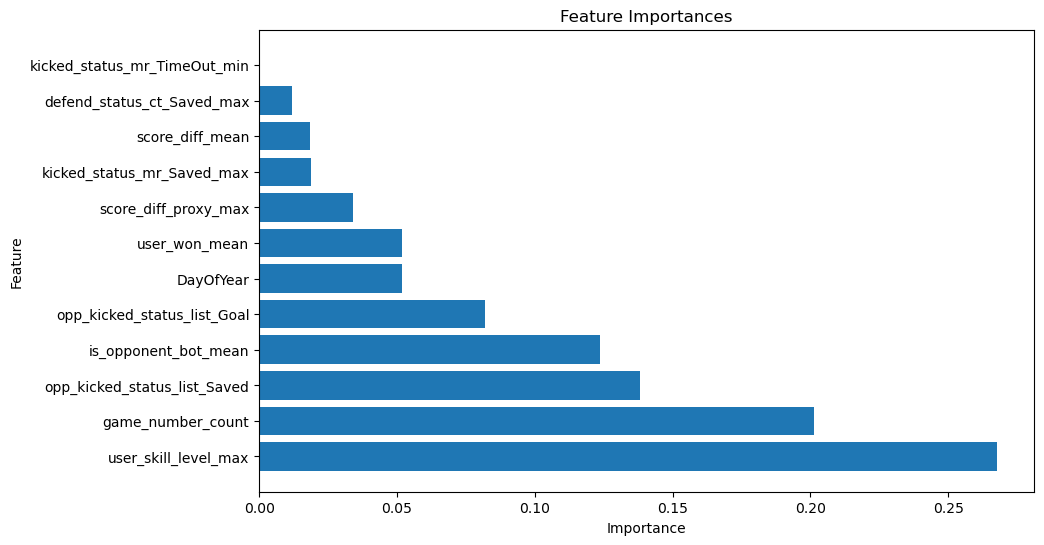

In [172]:


# Get all the features and importances
all_feature_names = X_train.columns[indices]
all_importances = importances[indices]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(all_feature_names)), all_importances, align='center')
plt.yticks(range(len(all_feature_names)), all_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [174]:
pwd

'/Users/satishkumarsahu/work/Adhoc/chilax'